In [ ]:
mkdir a2

In [ ]:
cd /content/a2/

/content/a2


In [ ]:
!git clone https://github.com/ruhyadi/YOLO3D

Cloning into 'YOLO3D'...
remote: Enumerating objects: 734, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 734 (delta 72), reused 227 (delta 44), pack-reused 475
Receiving objects: 100% (734/734), 24.87 MiB | 25.96 MiB/s, done.
Resolving deltas: 100% (264/264), done.


In [ ]:
%cd /content/a2/YOLO3D
!pip install -qr requirements.txt
!pip install -q pytorch-lightning comet-ml
print('[INFO] Installation completed...')

/content/a2/YOLO3D
     |████████████████████████████████| 701 kB 6.7 MB/s 
     |████████████████████████████████| 596 kB 54.8 MB/s 
     |████████████████████████████████| 373 kB 72.1 MB/s 
     |████████████████████████████████| 141 kB 75.7 MB/s 
     |████████████████████████████████| 5.8 MB 58.9 MB/s 
     |████████████████████████████████| 419 kB 72.9 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 157 kB 68.7 MB/s 
     |████████████████████████████████| 510 kB 64.2 MB/s 
     |████████████████████████████████| 157 kB 61.9 MB/s 
     |████████████████████████████████| 157 kB 77.3 MB/s 
     |████████████████████████████████| 156 kB 69.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorbo

In [ ]:
!ln -s \
    /content/drive/MyDrive/training/image_2 \
    /content/a2/YOLO3D/dataset/KITTI/training/

# label_2
!ln -s \
    /content/drive/MyDrive/training/label_2 \
    /content/a2/YOLO3D/dataset/KITTI/training/

# calib
!ln -s \
    /content/drive/MyDrive/training/calib \
    /content/a2/YOLO3D/dataset/KITTI/training/

ln: failed to create symbolic link '/content/a2/YOLO3D/dataset/KITTI/training/calib': File exists


In [ ]:
%cd /content/a2/YOLO3D

!python train.py \
    --epochs 10 \
    --batch_size 32 \
    --num_workers 2 \
    --save_epoch 5 \
    --train_path /content/a2/YOLO3D/dataset/KITTI/training \
    --model_path /content/a2/YOLO3D/weights \
    --select_model resnet18 \
    --api_key xxx

/content/a2/YOLO3D
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can

In [ ]:
%cd /content/a2/YOLO3D

!pip install -q --upgrade --no-cache-dir gdown

/content/a2/YOLO3D
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
%cd /content/a2/YOLO3D/weights/
!python get_weights.py --weights 'resnet18'

/content/a2/YOLO3D/weights
Downloading...
From: https://drive.google.com/uc?id=1k_v1RrDO6da_NDhBtMZL5c0QSogCmiRn
To: /content/a2/YOLO3D/weights/resnet18.pkl
100% 298M/298M [00:06<00:00, 46.9MB/s]


In [ ]:
%cd /content/YOLO3D/
!python inference.py \
  --weights yolov5s.pt \
  --source /content/a2/YOLO3D/eval/image_2 \
  --reg_weights /content/a2/YOLO3D/weights/resnet18_epoch_10.pkl \
  --model_select resnet18 \
  --output_path /content/a2/YOLO3D/runs \
  --save_result

[Errno 2] No such file or directory: '/content/YOLO3D/'
/content/a2/YOLO3D
inference: weights=['yolov5s.pt'], source=/content/a2/YOLO3D/eval/image_2, data=data/coco128.yaml, imgsz=[640, 640], device=, classes=[0, 2, 3, 5], reg_weights=/content/a2/YOLO3D/weights/resnet18_epoch_10.pkl, model_select=resnet18, calib_file=eval/camera_cal/calib_cam_to_cam.txt, show_result=False, save_result=True, output_path=/content/a2/YOLO3D/runs
YOLOv5 🚀 4c3027f torch 1.9.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/a2/YOLO3D/eval/image_2/000010.png: 224x640 13 cars, Done. (0.009s)
Speed: 0.4ms pre-process, 9.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
YOLOv5 🚀 4c3027f torch 1.9.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/a2/YOLO3D/eval/image_2/000036.png: 224x640 11 cars, Done. (0.008s)
S

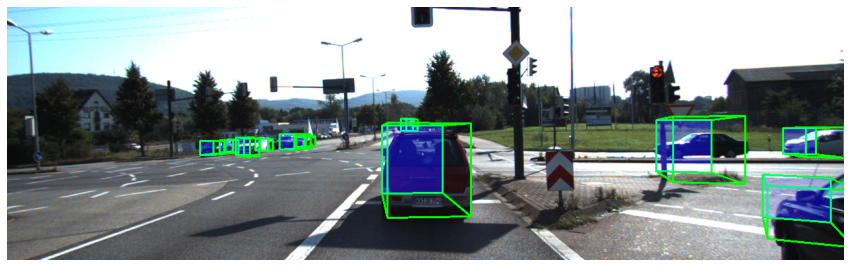

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread('/content/a2/YOLO3D/runs/001.png'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
!pip install torchvision==0.10.1
!pip install torch==1.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.1 MB 115.3 MB/s 
     |████████████████████████████████| 831.4 MB 6.9 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.9.1 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.9.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-pyth